In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [228]:
df=pd.read_csv('titanic.csv')

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1305 non-null   int64  
 1   survived  1305 non-null   int64  
 2   name      1305 non-null   object 
 3   sex       1305 non-null   object 
 4   age       1042 non-null   float64
 5   sibsp     1305 non-null   int64  
 6   parch     1305 non-null   int64  
 7   ticket    1305 non-null   object 
 8   fare      1305 non-null   float64
 9   cabin     293 non-null    object 
 10  embarked  1305 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.3+ KB


In [230]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,512.3292,NaN,C
1,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,512.3292,NaN,C
2,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,512.3292,NaN,C
3,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,512.3292,NaN,C
4,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,263.0000,NaN,C


Here we can see we can't find any null values. Lets confirm it with a function

In [231]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           0
cabin       1012
embarked       0
dtype: int64

Now, we can see the present null values.Lets visualize for a clear understanding.

<AxesSubplot:>

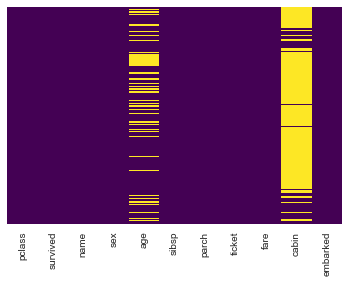

In [232]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

    From this heatmap, Age value has some null values, we can impute some logic to overcome this. On the same side cabin column have lot of null values, so we can remove that column.
Lets go to EDA and get insights.

<AxesSubplot:xlabel='survived', ylabel='count'>

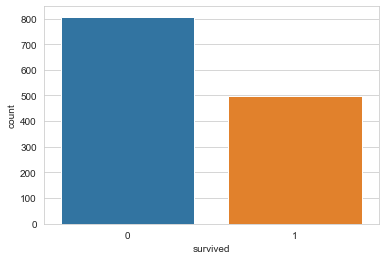

In [233]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df)

    From this graph we can see that, Most of the people lost their lives. Only over a half of the peoples are survived. We know that most of the survivors must be females by the domain knowledge.
Lets check the survival based on the gender. 

<AxesSubplot:xlabel='survived', ylabel='count'>

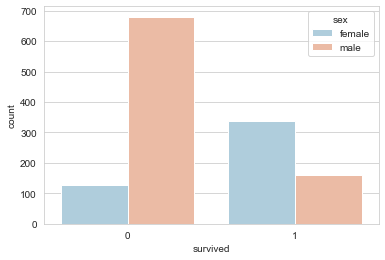

In [234]:
sns.countplot(x='survived',hue='sex',data=df,palette='RdBu_r')

    Now its confirmed, Most of the survivors are females(blue bars) only few of them are died on that day, and most of the mens lost their lives and mens survival rate is too low.
I can tell that, there is relationship between survived peoples and their passenger class. Lets check that too.

<AxesSubplot:xlabel='survived', ylabel='count'>

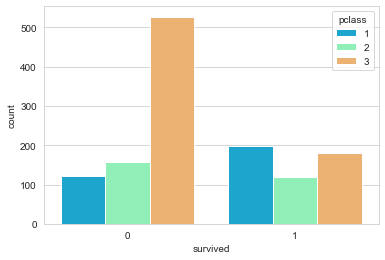

In [235]:
sns.countplot(x='survived',hue='pclass',data=df,palette='rainbow')

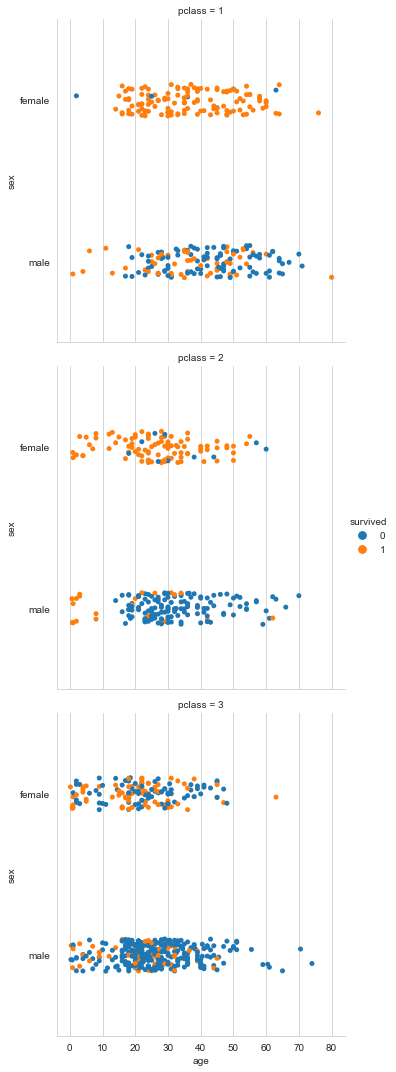

In [236]:
sns.catplot(x='age',y='sex',hue='survived',data=df,row='pclass')

This plot shows that, 
    
    1st class passengers are mostly survived compared to the death rate of 1st class. Bcz we can say that, people in 1st class must be from high financial background, and they used that to escape.
    2nd class passengers nearly half of them are survived, unlike 1st class they have average financial background, only some of thems are exceptional.
    3rd class passengers are low incomed, in this class only females are escaped or alive, Most peoples lost their lives.

<AxesSubplot:xlabel='age'>

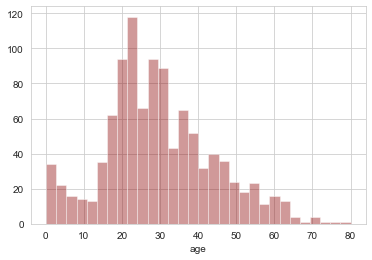

In [237]:
sns.distplot(df['age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:>

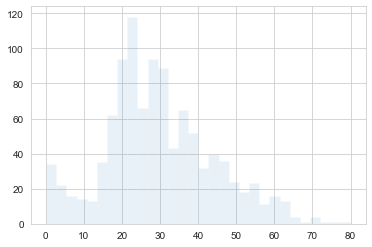

In [238]:
df['age'].hist(bins=30,alpha=0.1)

    This plot shows age groups of the people. Most of the peoples are from 19-32 age.

<AxesSubplot:xlabel='sibsp', ylabel='count'>

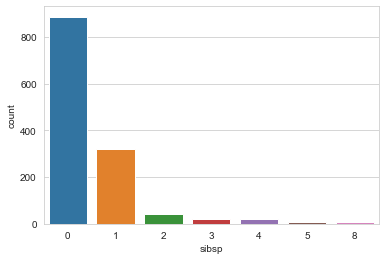

In [239]:
sns.countplot(x='sibsp',data=df)

    This plot shows sibiling spouse details. According to this graph, Peoples are mostly came onboard single person without their families. The rest of them shows family members(childrens & wife) count.

## Data Cleaning

    We know that independent variable 'age' have some null values. And we can drop the 'cabin' data as well. Lets impute
    some values for age.

<AxesSubplot:xlabel='pclass', ylabel='age'>

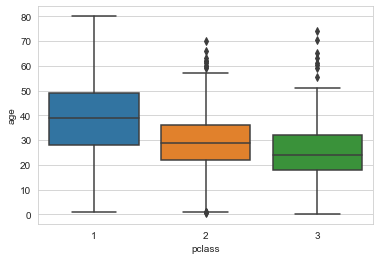

In [240]:
sns.boxplot(x='pclass',y='age',data=df)

    We will use these average age values to impute based on passenger class for age.

In [241]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 39
        elif pclass==2:
            return 29
        else:
            return 24
    else: 
        return age

In [242]:
df['age'] = df[['age','pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

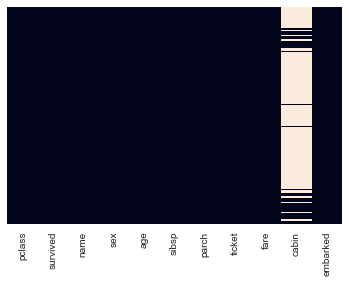

In [243]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

    Now we managed to impute the values for age variable, the next one is to dro the cabin variable.

In [244]:
df.drop('cabin',axis=1,inplace=True)

    Now lets check the heatmap again!!

<AxesSubplot:>

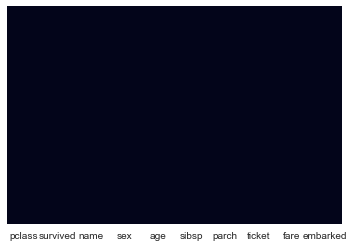

In [245]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [246]:
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,512.3292,C
1,3,0,"Zabour, Miss. Thamine",female,24.0,1,0,2665,512.3292,C
2,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,512.3292,C
3,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,512.3292,C
4,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,263.0000,C
5,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,263.0000,C
6,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,263.0000,C
7,3,0,"Yousif, Mr. Wazli",male,24.0,0,0,2647,263.0000,C
8,3,0,"Yousseff, Mr. Gerious",male,24.0,0,0,2627,263.0000,C
9,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,227.5250,C


    Great! Now our dataset looks pretty,right?

### Converting Categorical features into Numeric:

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1305 non-null   int64  
 1   survived  1305 non-null   int64  
 2   name      1305 non-null   object 
 3   sex       1305 non-null   object 
 4   age       1305 non-null   float64
 5   sibsp     1305 non-null   int64  
 6   parch     1305 non-null   int64  
 7   ticket    1305 non-null   object 
 8   fare      1305 non-null   float64
 9   embarked  1305 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.1+ KB


    we can see that we dont need name, ticket things. Bcz it doesn't affect the dependent variable.
    And we need to impute some values for sex and embarked variables.
Lets do these things.

In [248]:
sex=pd.get_dummies(df['sex'],drop_first=True)
embark_town=pd.get_dummies(df['embarked'],drop_first=True)

In [249]:
embark_town.head()

,Q,S
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [250]:
sex.head()

,male
0,0
1,0
2,1
3,1
4,1


Lets drop the unwanted columns and add these two dummies into the dataset

In [251]:
df.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

In [252]:
df.head()

,pclass,survived,age,sibsp,parch,fare
0,3,0,14.5,1,0,512.3292
1,3,0,24.0,1,0,512.3292
2,3,0,26.5,0,0,512.3292
3,3,0,27.0,0,0,512.3292
4,3,0,27.0,1,0,263.0000


In [253]:
df=pd.concat([df,sex,embark_town],axis=1)

In [254]:
df.head()

,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,3,0,14.5,1,0,512.3292,0,0,0
1,3,0,24.0,1,0,512.3292,0,0,0
2,3,0,26.5,0,0,512.3292,1,0,0
3,3,0,27.0,0,0,512.3292,1,0,0
4,3,0,27.0,1,0,263.0000,1,0,0


    Great!! Now our data is good. Lets create the model with this data.

### Model Creation:

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [262]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('survived',axis=1),
                                                df['survived'],
                                                 test_size=0.30)

In [263]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
y_pred=logmodel.predict(x_test)

In [264]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [265]:
confusion_matrix(y_test,y_pred)

array([[220,  38],
       [ 38,  96]], dtype=int64)

In [266]:
print("Accuracy :",accuracy_score(y_test,y_pred))

Accuracy : 0.8061224489795918


    Through this simple logistic regression model we got 80% accuracy. If we can do other classifications algorithms it will give a better result than this. 